In [2]:
import numpy as np
import pandas as pd

In [3]:
p,f = "class.csv","zoo.csv"

In [4]:
data,classi = pd.read_csv(f),pd.read_csv(p)

In [5]:
y_verita = data['class_type'].to_numpy() ###questo è l'array verità in base al quale confrontare i vari risultati di clustering 
print(y_verita)


[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


# Preprocessing

In [6]:
X = data.drop(['animal_name']+['class_type'],axis=1)
###Eliminiamo dal dataframe i nomi degli animali che sono una variabile categorica e la classe di appartenenza che 
###vogliamo trovare con gli algoritmi di clustering

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
###come sappiamo applicando uno scaler otteniamo un oggetto numpy, perciò ricreiamo il dataframe utilizzando gli indici di colonna originali

In [9]:
Xs
###Come abbiamo visto il nostro dataset non contiene valori nulli e tutti gli attributi hanno valori booleani 1 o 0 
###a eccezione della colonna legs, perciò ho apllicato MinMaxScaler per scalare i valori in modo che anche legs 
###assuma valori tra 0 e 1.
###A questo punto i dati sono pronti per applicare gli algoritmi di clustering.

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


# Clustering

In [10]:
###come funziona ciascuno di questi algoritmi?????

Kmeans

In [11]:
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering,DBSCAN,Birch

In [12]:
kmeans = KMeans(n_clusters= 7,random_state=0)
### Random state è un parametro che ci serve per fare in modo che i centroidi di partenza siano determinati a partire 
### da un numero, e non generati casualmente in modo che ripetendo il clustering tutte le volte abbiamo lo stesso 
### risultato
y_pred_k = kmeans.fit_predict(Xs)

Agglomerative clustering

In [13]:
aggc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward' )
y_pred_aggc =aggc.fit_predict(Xs)

SpectralClustering

In [49]:
spc = SpectralClustering(n_clusters=7, assign_labels="discretize", random_state=0)
y_pred_spc = spc.fit_predict(Xs)

DBSCAN

In [18]:
dbscan =DBSCAN(eps=0.3,min_samples=4)
y_pred_dbscan = dbscan.fit_predict(Xv)
#### Ho verificato che con Dbscan otteniamo un risultato molto migliroe se usiamo il dataset in 2 dimensioni Xv
#### che a questo punto ci conviene calcolare prima della parte di results visualization    

Birch

In [19]:
brc = Birch(n_clusters=7, threshold = 0.1)
y_pred_brc = brc.fit_predict(Xs)

# Results visualization

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [21]:
pca = PCA(2)
Xv = pca.fit_transform(Xs)
### Applichiamo la principal component analysis per comprimere i dati in due dimensioni e poterli visualizzare.

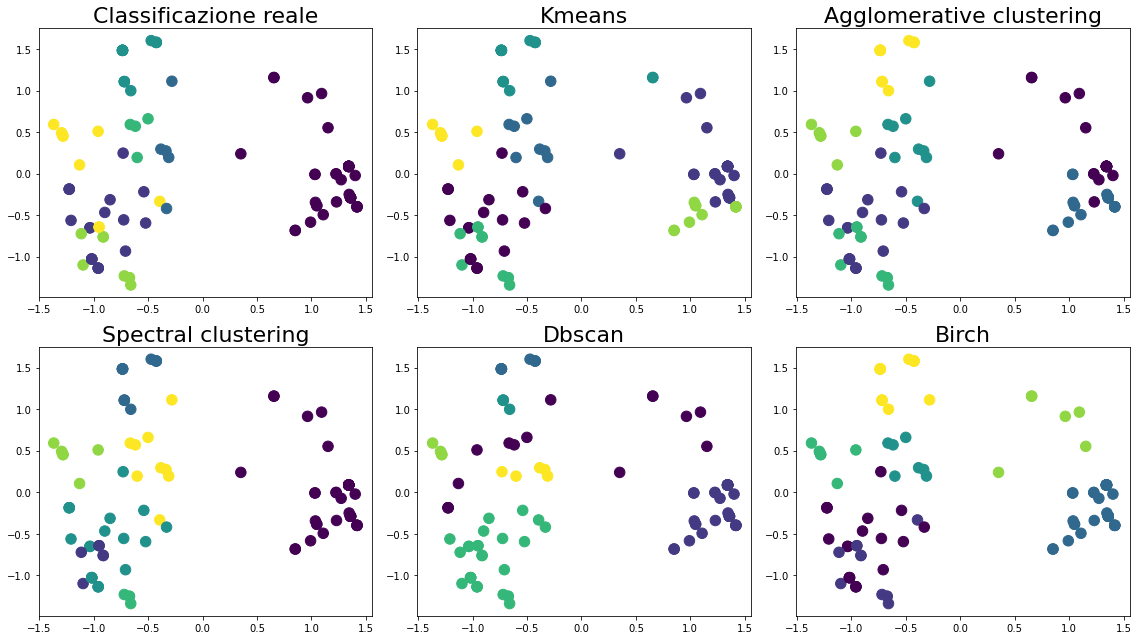

In [45]:
fig, ax = plt.subplots(figsize=(16,9),ncols=3, nrows=2)
ax[0][0].scatter(Xv[:,0],Xv[:,1], s=110, c=y_verita)
ax[0][1].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_k)
ax[0][2].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_aggc)
ax[1][0].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_spc)
ax[1][1].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_dbscan)
ax[1][2].scatter(Xv[:,0],Xv[:,1], s=110, c=y_pred_brc)

ax[0][0].set_title('Classificazione reale', fontsize = 22)
ax[0][1].set_title('Kmeans', fontsize = 22)
ax[0][2].set_title('Agglomerative clustering', fontsize = 22)
ax[1][0].set_title('Spectral clustering', fontsize = 22)
ax[1][1].set_title('Dbscan', fontsize = 22)
ax[1][2].set_title('Birch',fontsize = 22)

plt.tight_layout()
plt.show()
### Visualizziamo i diversi risultati di clustering sulle coordinate dei nostri animali portate in 2 dimensioni.

# Benchmark e interpretazione

In [23]:
from sklearn.metrics import adjusted_rand_score, completeness_score
### Bisogna dare una piccola descrizione di cosa misurano queste due metriche e perchè sono state scelte

Utilizziamo due metriche diverse per verificare quanto il risultato ottenuto con gli algoritmi di clustering sia accurato rispetto alla ground truth.

Kmeans

In [50]:
risultati = {}
k_c= completeness_score(y_verita,y_pred_k)
k_a = adjusted_rand_score(y_verita,y_pred_k)
risultati['Kmeans'] =[k_c,k_a]

AgglomerativeClustering

In [51]:
aggc_c= completeness_score(y_verita,y_pred_aggc)
aggc_a = adjusted_rand_score(y_verita,y_pred_aggc)
risultati['Agglomerative clustering']=[aggc_c,aggc_a]

SpectralClustering

In [52]:
spc_c= completeness_score(y_verita,y_pred_spc)
spc_a = adjusted_rand_score(y_verita,y_pred_spc)
risultati['Spectral clustering']=[spc_c,spc_a]

DBSCAN

In [53]:
dbscan_c= completeness_score(y_verita,y_pred_dbscan)
dbscan_a = adjusted_rand_score(y_verita,y_pred_dbscan)
risultati['Dbscan']=[dbscan_c,dbscan_a]

Birch

In [54]:
brc_c= completeness_score(y_verita,y_pred_brc)
brc_a = adjusted_rand_score(y_verita,y_pred_brc)
risultati['Birch']=[brc_c,brc_a]

In [55]:
risultati
###perchè è il migliore???

{'Kmeans': [0.7751030251507829, 0.6940118633468724],
 'Agglomerative clustering': [0.7935737537548521, 0.6828773460462316],
 'Spectral clustering': [0.9037420936277645, 0.9475184399253236],
 'Dbscan': [0.6714967974497269, 0.6242163665580235],
 'Birch': [0.8417081325549081, 0.8210050594486954]}

L'algoritmo migliore si rivela essere lo spectral clustering

In [30]:
## funzione per trovare la posizione di ogni membro del cluster nel dataset originale 
def select_points(X, y_pred, cluster_label):
    pos = [i for i, x in enumerate(y_pred) if x == cluster_label]
    return X.iloc[pos]

In [31]:
select_points(data,y_pred_spc,3)
###  Tutti animali dello stesso class_type eccetto la tartaruga come ci aspettiamo visto il punteggio molto 
###  alto dell'algoritmo spectral clustering

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
33,gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
41,kiwi,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
56,ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2


In [32]:
select_points(data,y_pred_dbscan,3)
### dbscan invece conferma il punteggio basso mettendo nella stessa classe animali piuttosto diversi

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6


In [34]:
from scipy.cluster.hierarchy import dendrogram , linkage

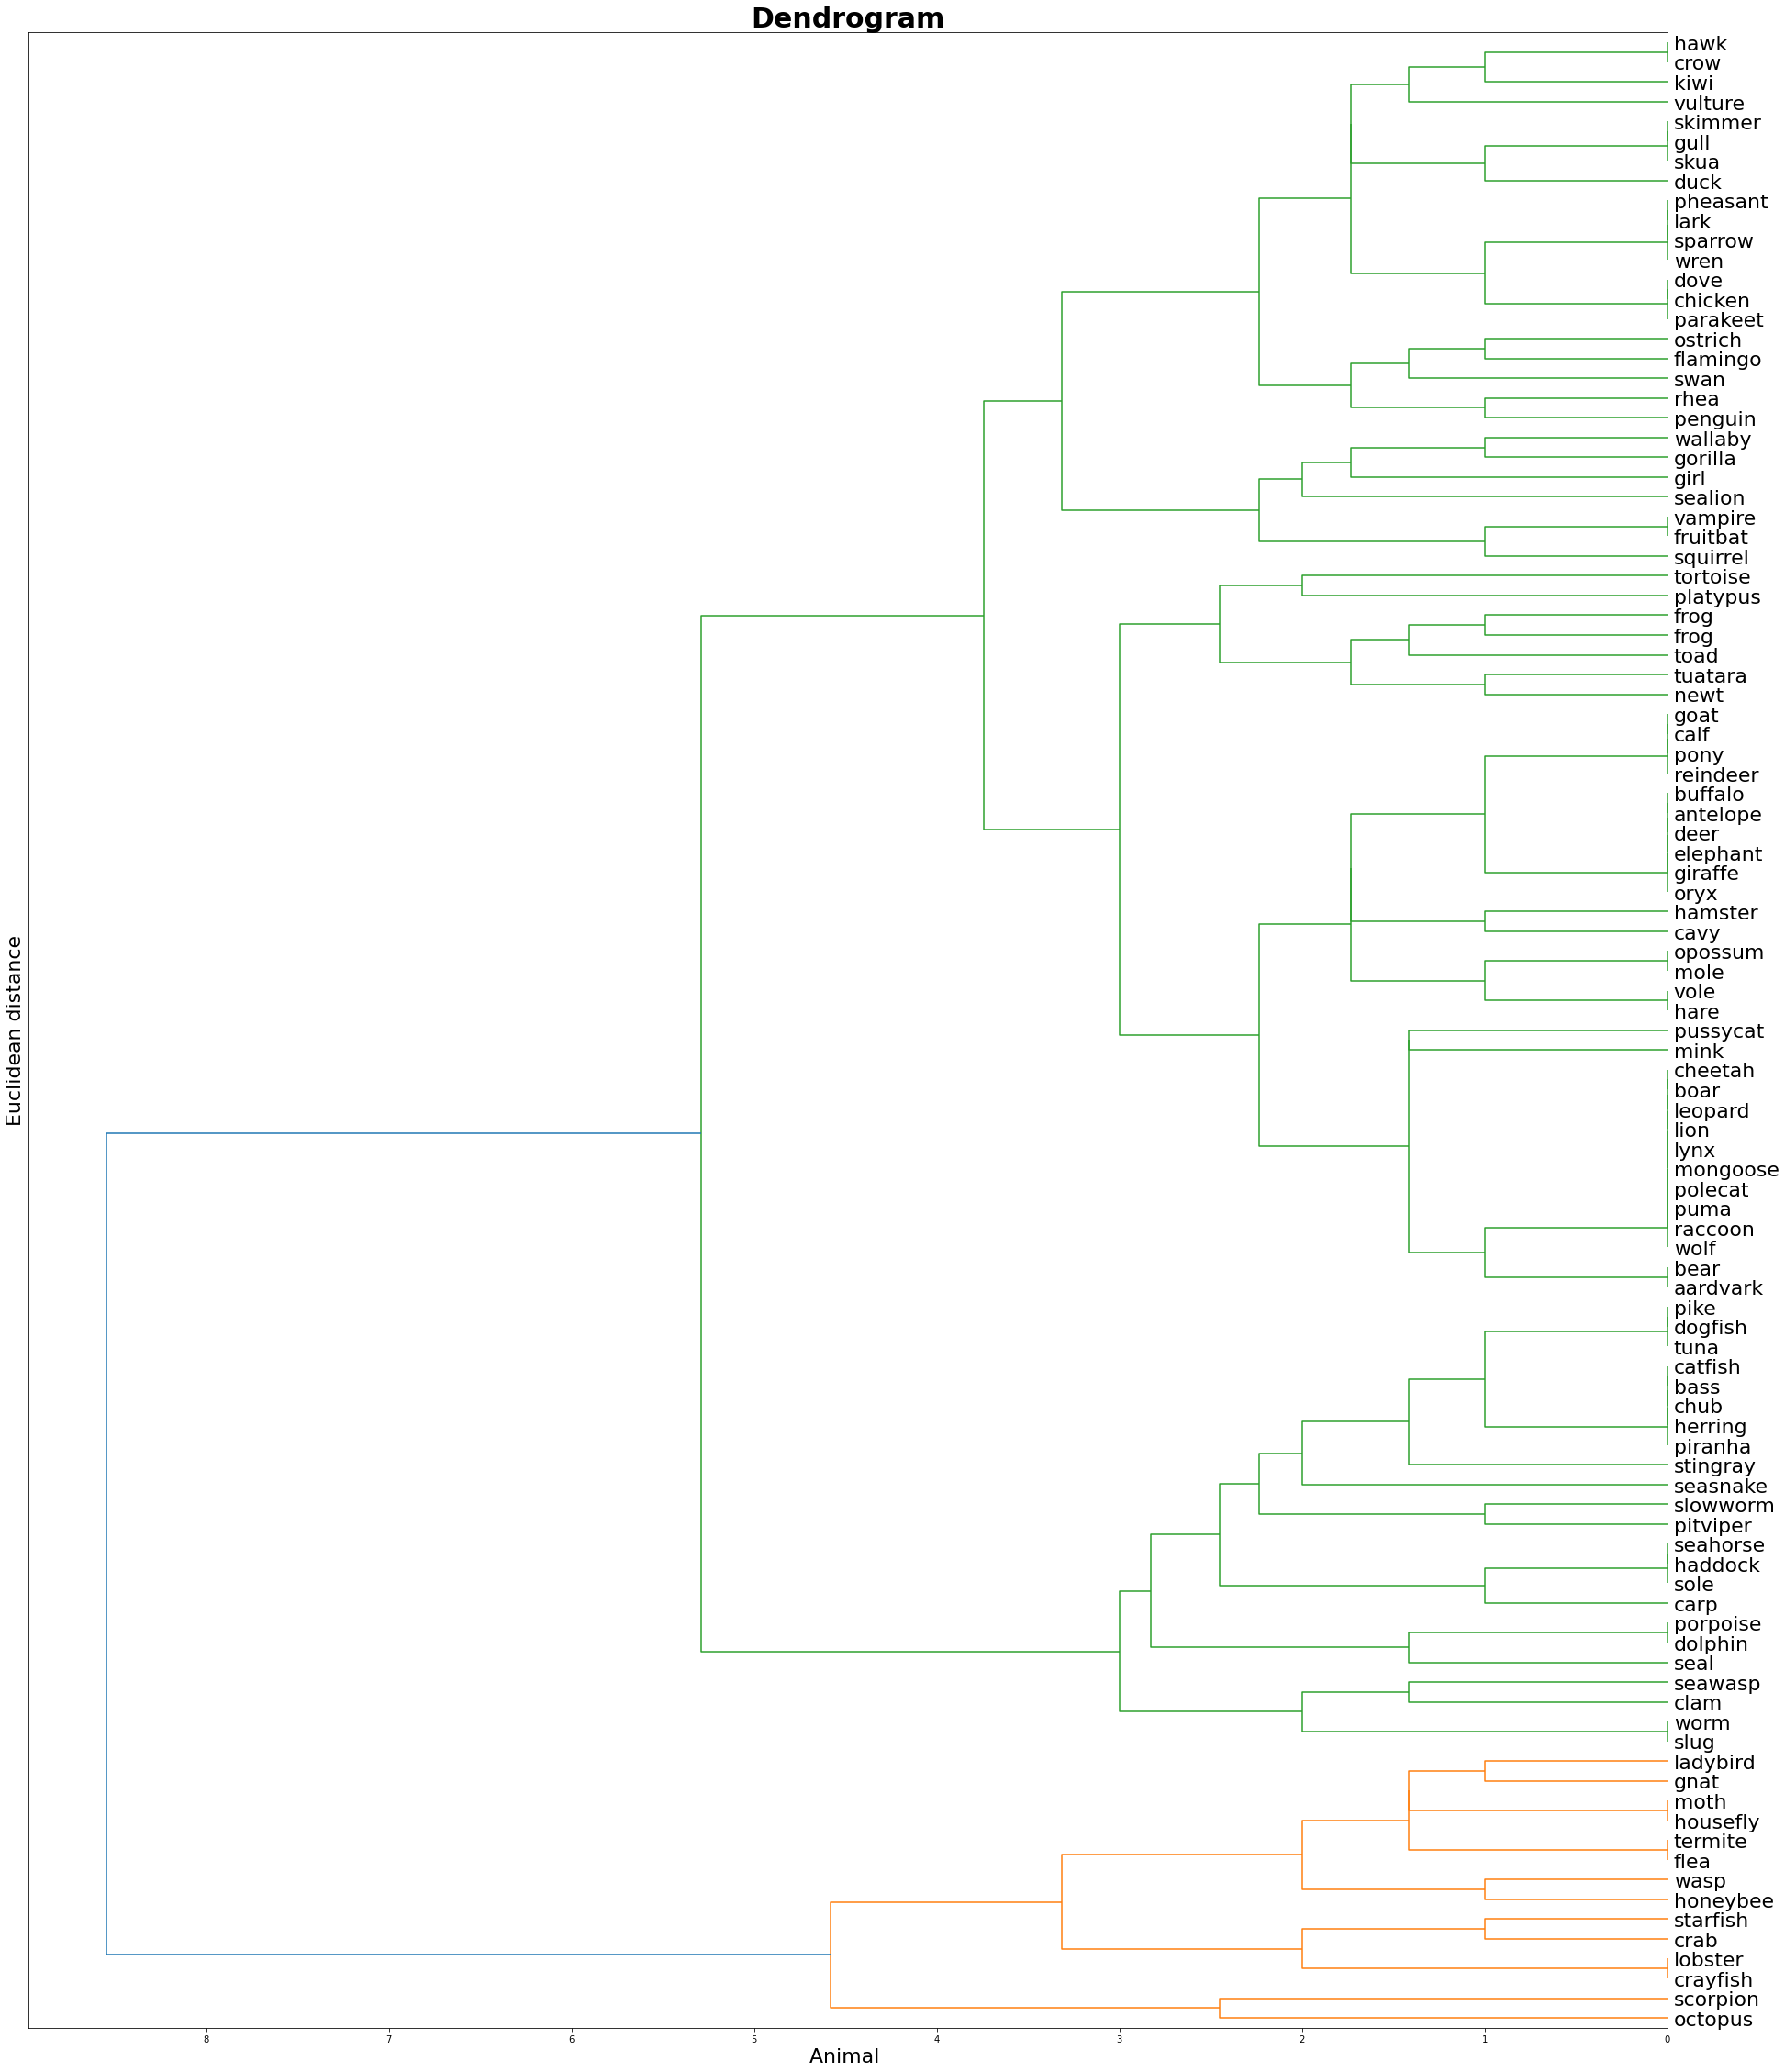

In [56]:
##qui costruisco un dendogramma per un clustering gerarchico
Z = linkage(X, method = 'complete')
plt.figure(figsize = (32,40))
dendro = dendrogram(Z, orientation = "left",
                   labels=[x for x in data["animal_name"]],
                   leaf_font_size=22)
plt.title("Dendrogram", fontsize = 30, fontweight="bold")
plt.ylabel('Euclidean distance', fontsize = 22)
plt.xlabel("Animal ", fontsize = 22)
plt.show()